# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [1]:
# load lib for dlib face detector
import dlib

# load lib for working with image
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

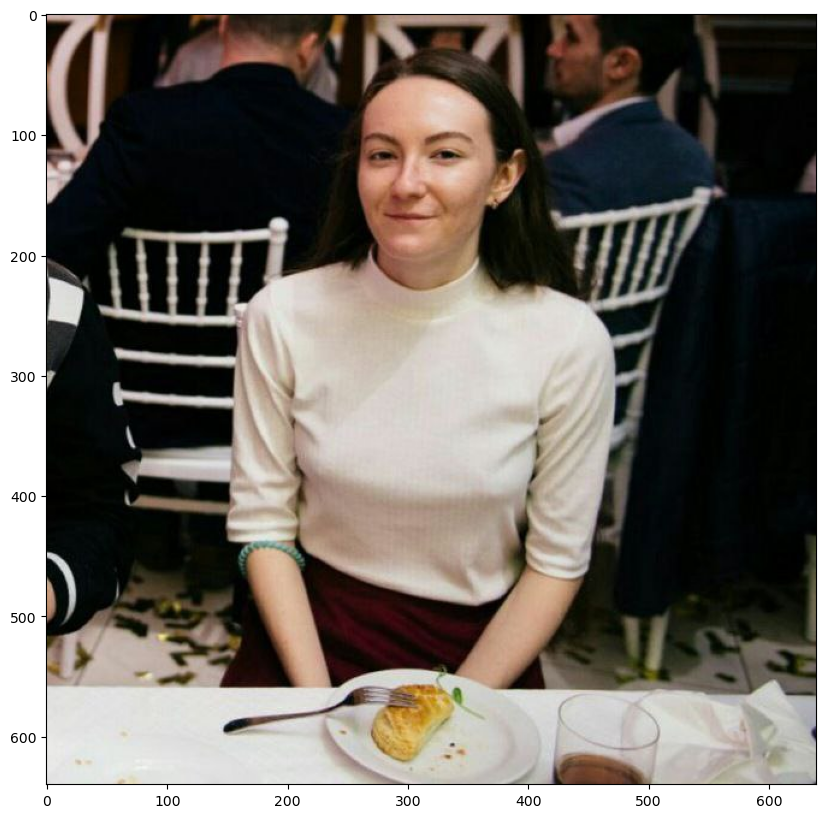

In [2]:
# load image and convert to RGB and gray
img = cv2.imread('data/main.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# print image
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [3]:
# Let's load the detector
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [4]:
# Detect faces, see http://dlib.net/face_detector.py.html
# 1 --> upsampling factor
rects = detector(gray, 1)

print('Number of detected faces:', len(rects))
print(rects)
print(rects[0].left)

def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

Number of detected faces: 1
rectangles[[(239, 67) (368, 196)]]
<bound method PyCapsule.left of rectangle(239,67,368,196)>


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

239 67 129 129


(<matplotlib.image.AxesImage at 0x7fe7ac52a0e0>, Text(0.5, 1.0, 'dlib'))

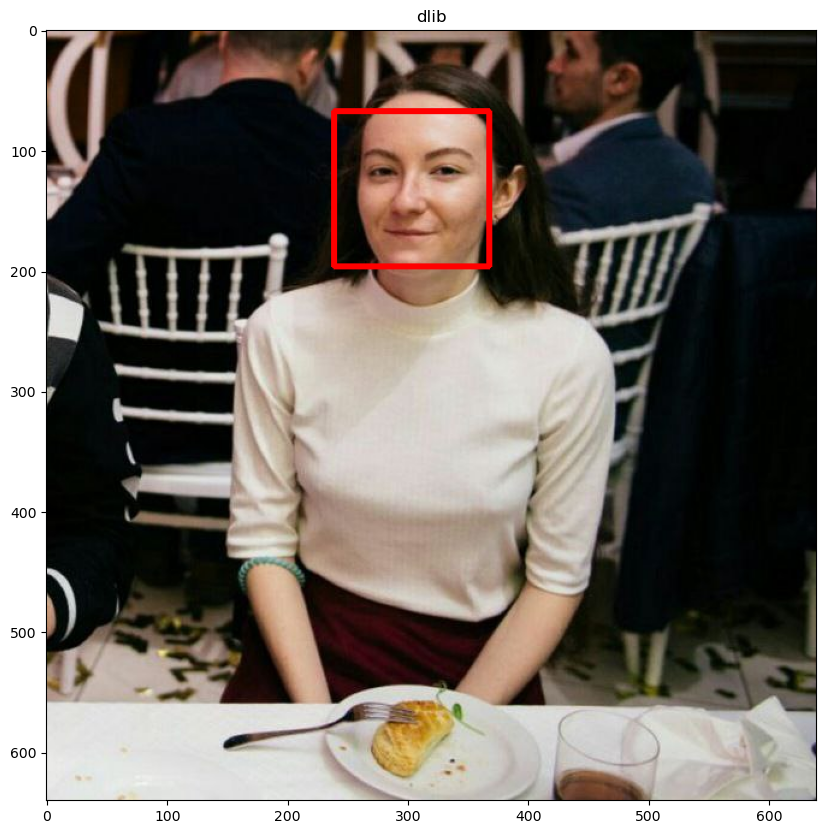

In [33]:
# Draw rectangle around each face
result_dlib = np.copy(img)
# Use different colour for each face
colors = ((255, 0, 0),
          (0, 255, 0),
          (0, 0, 255),
          (64, 64, 64),
          (154, 154, 154),
          (192, 192, 192),
          (255, 255, 255))

i = 0
for rect in rects:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), colors[i], 3)

plt.imshow(result_dlib), plt.title('dlib')

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

In [28]:
def dlib_pipeline(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.imshow(img)

    detector = dlib.get_frontal_face_detector()

    rects = detector(gray, 1)

    print('Number of detected faces:', len(rects))

    result_dlib = np.copy(img)

    i = 0
    for rect in rects:
        x, y, w, h = rect_to_bb(rect)
        print(x, y, w, h)
        cv2.rectangle(result_dlib, (x, y), (x+w, y+h), colors[i], 3)
        i = i + 1

    return result_dlib

# Picture of a cartoon character

Number of detected faces: 1
280 280 666 666


(<matplotlib.image.AxesImage at 0x7fe7ac719330>, Text(0.5, 1.0, 'dlib'))

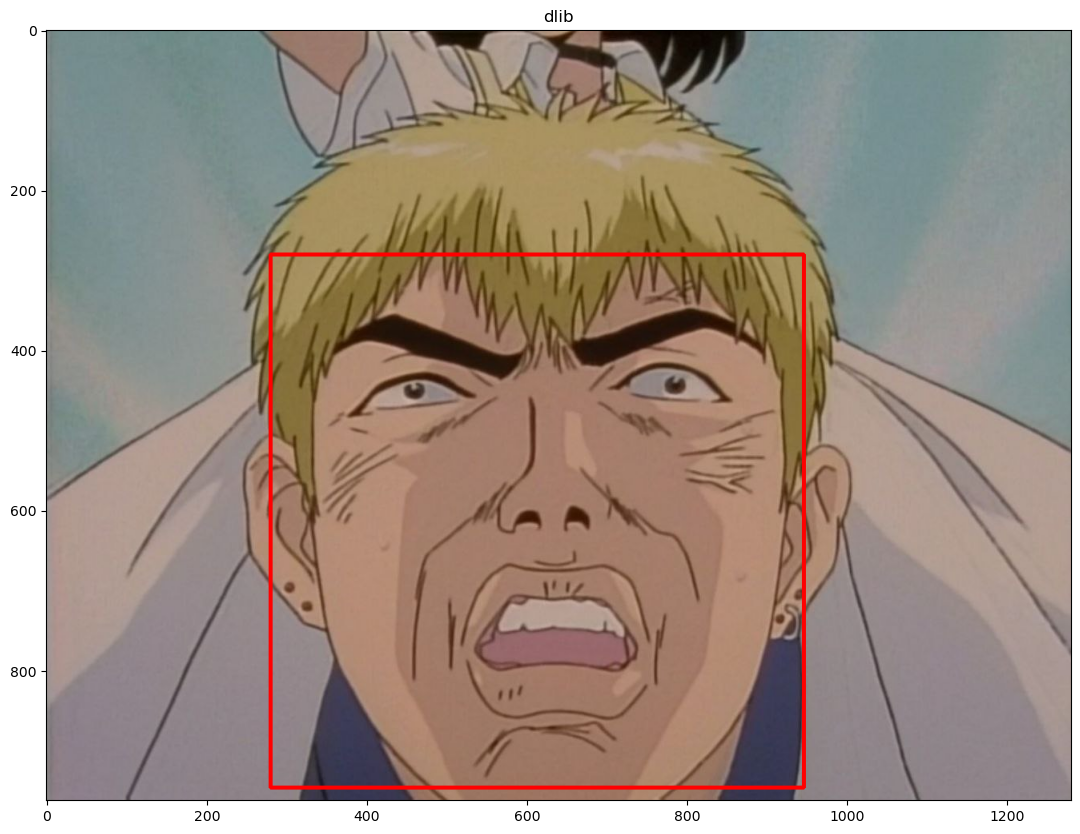

In [29]:
plt.imshow(dlib_pipeline('data/anime.jpg')), plt.title('dlib')

# A photograph in which part of the face is not visible

Number of detected faces: 0


(<matplotlib.image.AxesImage at 0x7fe7ac598d00>, Text(0.5, 1.0, 'dlib'))

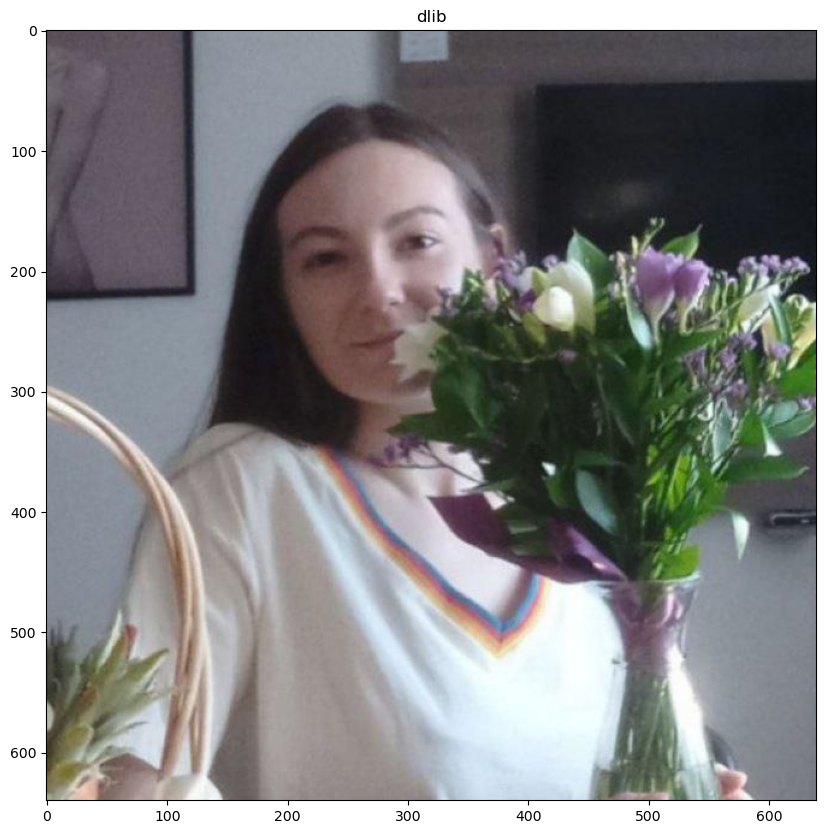

In [30]:
plt.imshow(dlib_pipeline('data/half_face.jpg')), plt.title('dlib')

# A face in a hat and a monument

Number of detected faces: 2
458 297 52 52
205 106 90 90


(<matplotlib.image.AxesImage at 0x7fe7ac614c40>, Text(0.5, 1.0, 'dlib'))

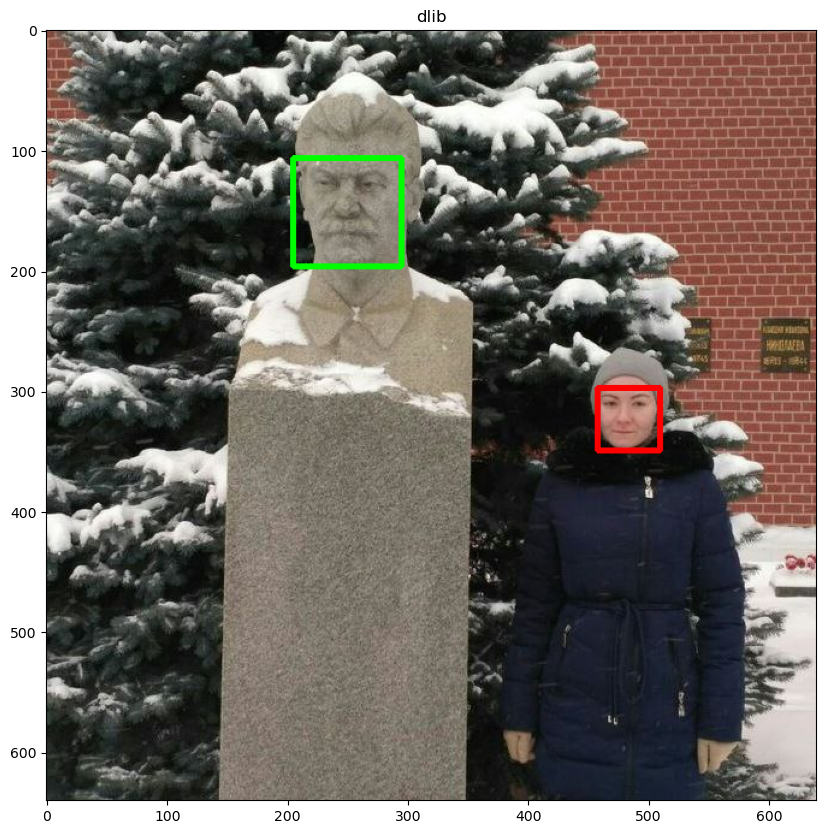

In [31]:
plt.imshow(dlib_pipeline('data/hat.jpg')), plt.title('dlib')

# Photo with many people

Number of detected faces: 7
170 78 52 52
370 66 62 63
315 59 62 63
106 72 52 52
222 72 51 52
432 66 62 63
259 66 63 63


(<matplotlib.image.AxesImage at 0x7fe7ac529330>, Text(0.5, 1.0, 'dlib'))

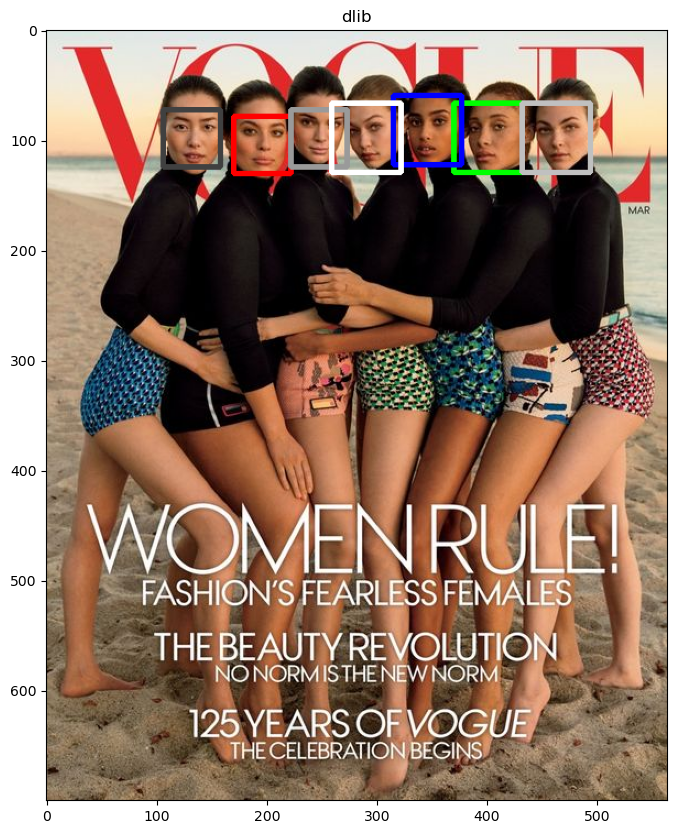

In [34]:
plt.imshow(dlib_pipeline('data/more_people.jpg')), plt.title('dlib')

# Glasses in photo. One face appears much smaller than the other

Number of detected faces: 2
375 376 385 385
142 514 223 223


(<matplotlib.image.AxesImage at 0x7f3b22037610>, Text(0.5, 1.0, 'dlib'))

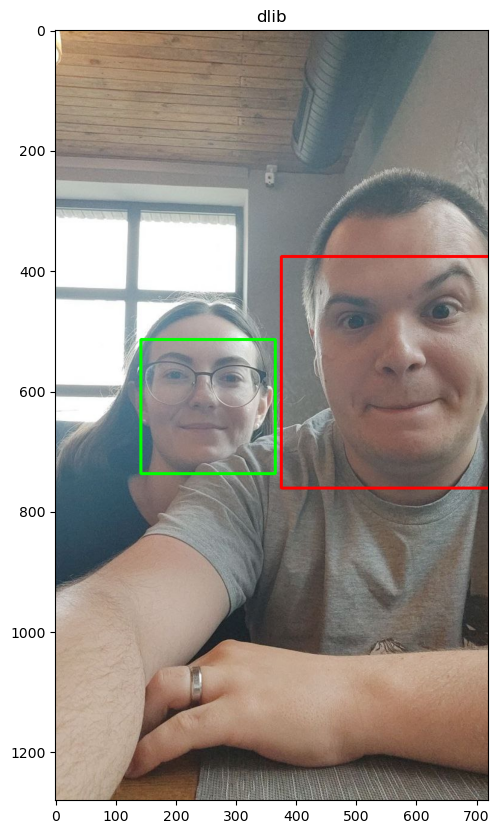

In [11]:
plt.imshow(dlib_pipeline('data/small_face_glasses.jpg')), plt.title('dlib')

# No one is looking directly at the camera in this photo

Number of detected faces: 1
103 259 108 108


(<matplotlib.image.AxesImage at 0x7f3b21ec6c20>, Text(0.5, 1.0, 'dlib'))

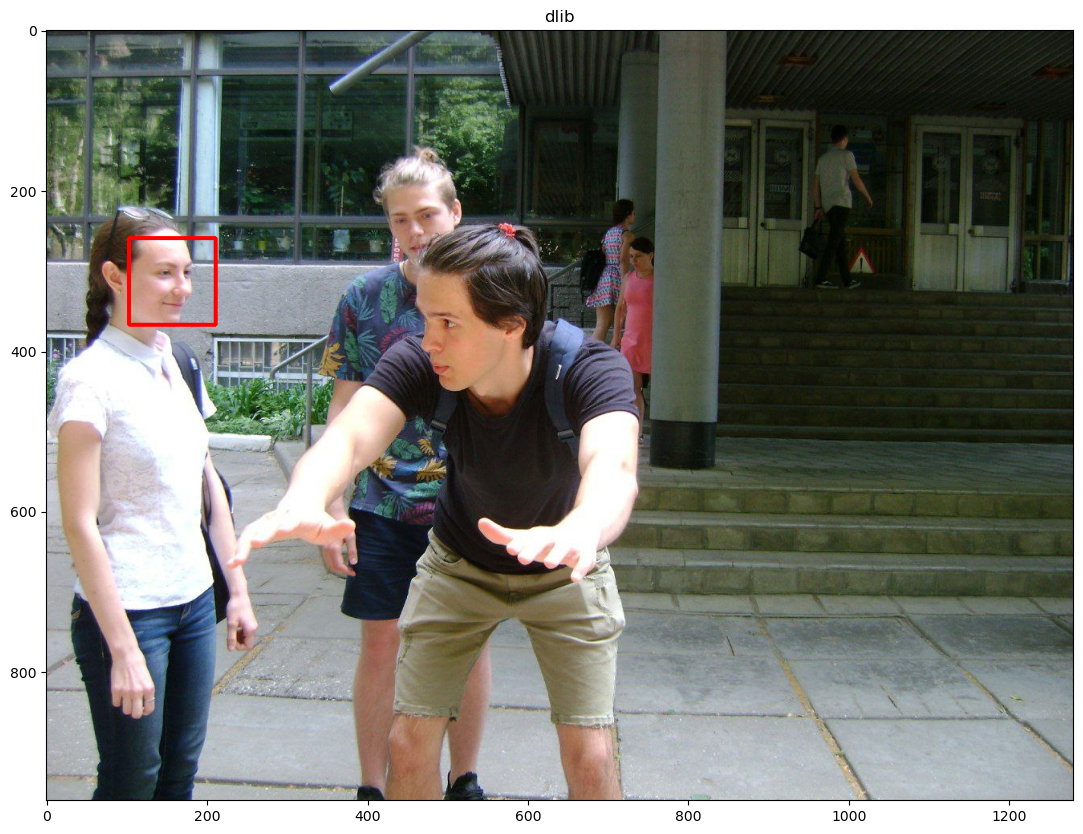

In [12]:
plt.imshow(dlib_pipeline('data/unfolded_face.jpg')), plt.title('dlib')

To sum up: 

Successfully recognized: 4

* Glasses in photo. One face appears much smaller than the other
* Photo with many people
* A face in a hat and a monument
* Picture of a cartoon character

Not recognized: 1

* A photograph in which part of the face is not visible

Wrongly recognized: 1

* No one is looking directly at the camera in this photo


I think, that detector is robust enough, if the face is fully visible and turned towards the camera, but a slight turn to the side is allowed.